In [1]:
__author__ = "@Tssp"
__date__   = "23/05/22"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
from matplotlib.ticker import AutoMinorLocator
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
ref_ticksize = 16
plt.rcParams['xtick.labelsize']=ref_ticksize
plt.rcParams['ytick.labelsize']=ref_ticksize
plt.rcParams['legend.fontsize']=ref_ticksize
plt.rcParams['axes.labelsize']=ref_ticksize * 3/2
plt.rcParams['axes.titlesize']=ref_ticksize * 3/2
aur = (1 + np.sqrt(5)) / 2
aursize = (5*aur, 5)

In [2]:
delta = np.loadtxt('Simulations/delta_asc.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [3]:
# Parameters and Constants:
mass  = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky    = 2*np.pi/lambd
Iy    = 4993 * (1e4 / Eh * to * ao**2)
Vy    = alpha * Iy # a.u
Iy    = Vy/alpha
wy    = np.sqrt( 2 * Vy * ky**2 / mass)       
dho   = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [6]:
print(os.getcwd())
folder_path = "Simulations/ix2648_LiLi/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q1dq2d


In [7]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x18000_y18000_z18000_152rm8g2l34m24_102CM8g1L34M24_LiLi_a3Sup_0{d}_Li7Li7_nx6ny6nz6_nx6ny6nz6_ix2648iy4993iz50_ix2648iy50iz50/Ag_vsLiLi1d2d_rm250_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.69000', '.69100', '.69200', '.69300', '.69400', '.69500', '.69600', '.69700', '.69800', '.69900', '.70000', '.70100', '.70200', '.70205', '.70210', '.70215', '.70220', '.70225', '.70230', '.70235', '.70240', '.70245', '.70250', '.70255', '.70260', '.70265', '.70270', '.70275', '.70280', '.70285', '.70290', '.70295', '.70300', '.70305', '.70310', '.70315', '.70316', '.70320', '.70325', '.70330', '.70335', '.70340', '.70345', '.70350', '.70355', '.70360', '.70365', '.70370', '.70375', '.70380', '.70385', '.70390', '.70395', '.70400', '.70405', '.70410', '.70415', '.70420', '.70425', '.70430', '.70435', '.70440', '.70445', '.70450', '.70455', '.70460', '.70465', '.70470', '.70475', '.70480', '.70485', '.70490', '.70495', '.70500', '.70505', '.70510', '.70515', '.70520', '.70525', '.70530', '.70535', '.70540', '.70545', '.70550', '.70555', '.70556', '.70557', '.70558', '.70559', '.70560', '.70561', '.70562', '.70563', '.70564', '.70565', '.70

In [8]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [9]:
dic = transpose_energies(Data)

Levels: 12550, as points: 97


In [10]:
least_bound_pos = 2504

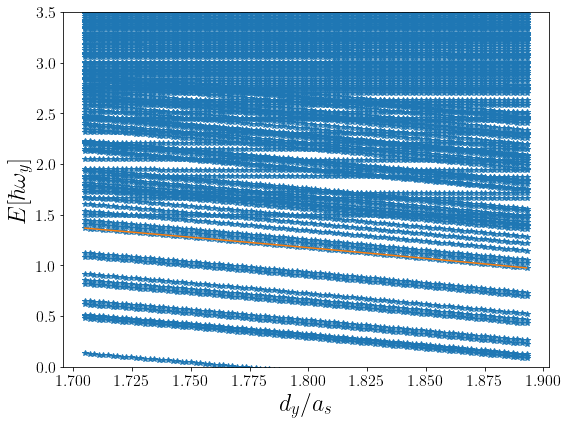

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 150):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'C0*')
ax.plot(x, dic['nivel_2515']/wy, 'C1')
ax.set_ylim(0, 3.5)
#ax.set_xlim(-2, 2)
#ax.vlines(x[311], 0, 10, alpha=0.5, linestyles='--', color='k')
#ax.vlines(x[270], 0, 10, alpha=0.5, linestyles='--', color='k')
#ax.vlines(x[210], 0, 10, alpha=0.5, linestyles='--', color='k')
#ax.vlines(x[170], 0, 10, alpha=0.5, linestyles='--', color='k')
#ax.vlines(x[140], 0, 10, alpha=0.5, linestyles='--', color='k')
#ax.vlines(x[120], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.set_xlabel('$d_{y}/a_s$')
ax.set_ylabel('$E[\hbar \omega_{y}]$')
plt.tight_layout()
#fig.savefig('Results/Figures/Ix2890_LiLi_3d_2d_Easc.png', dpi=200)
plt.show()

## Resonance x<1

In [12]:
%matplotlib inline

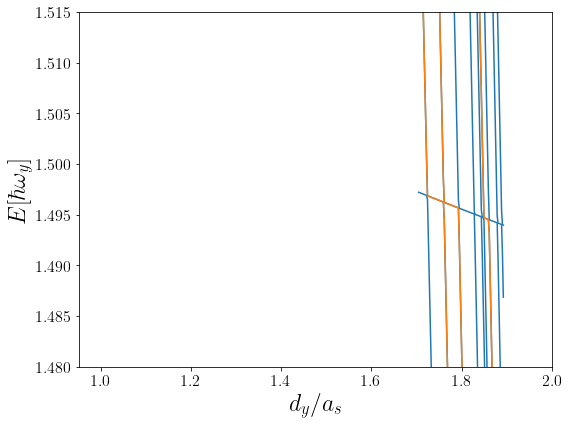

In [46]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 150):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'C0')
    
ax.plot(x, dic['nivel_2519']/wy, 'C1')
ax.plot(x, dic['nivel_2520']/wy, 'C1')
ax.plot(x, dic['nivel_2524']/wy, 'C1')
ax.set_ylim(1.48, 1.515)
ax.set_xlim(0.95, 2)
ax.plot(0.59284, 2.60851, 'w*', markersize=16, markeredgecolor='k')
ax.set_xlabel('$d_{y}/a_s$')
ax.set_ylabel('$E[\hbar \omega_{y}]$')
plt.tight_layout()
#fig.savefig('Results/Figures/Ix2890_LiLi_1d_2d_Easc.png', dpi=200)
plt.show()

1.8056573538556507e-15
[0.0, -5.53143279248491 + 0.e-20*I, 1.72437473789625 - 0.e-22*I, 9.16469137050405 + 0.e-22*I]
Write the position of the correct solution: 2
[0.0, -5.53143279248491 + 0.e-20*I, 1.72437473789625 - 0.e-22*I, 9.16469137050405 + 0.e-22*I]
Write the position of the correct solution: 2
[0.0, -5.3909490866622 + 0.e-22*I, 1.76317324001877 - 0.e-22*I, 8.98540916255882 - 0.e-20*I]
Write the position of the correct solution: 2
[0.0, -5.3909490866622 + 0.e-22*I, 1.76317324001877 - 0.e-22*I, 8.98540916255882 - 0.e-20*I]
Write the position of the correct solution: 2
[0.0, -5.87354823434043 - 0.e-22*I, 1.84985024595383 + 0.e-19*I, 9.38133130430198 + 0.e-20*I]
Write the position of the correct solution: 2
[0.0, -5.87354823434043 - 0.e-22*I, 1.84985024595383 + 0.e-19*I, 9.38133130430198 + 0.e-20*I]
Write the position of the correct solution: 2


(1.7, 1.9)

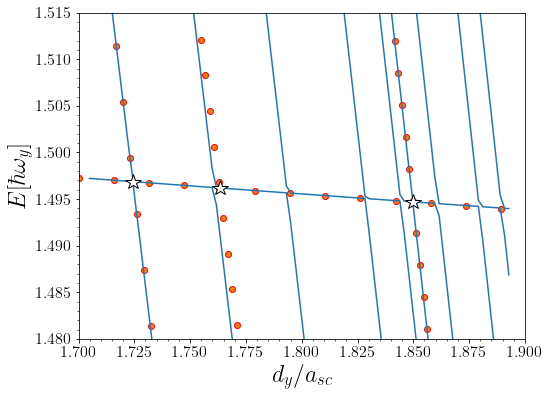

In [53]:
fig3, ax3 = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 80):
    ax3.plot(x, dic['nivel_{}'.format(i)]/wy, 'C0')

# nivel 2518:
trap_poly = trap_fit(dic, x, x_lims=(1.71, 1.9), y_lims=(1.48, 1.53) ,levels=(2518, 2524), tol=10, wy=wy)/wy
x2518 = np.linspace(1.7, 2, num=20)
ax3.scatter(x2518, np.polyval(trap_poly, x2518), edgecolor='r', facecolor='C1', label='Diabatic', zorder=1)

# nivel 2519:
f2519 = np.polyfit(x[(x < 1.72) & (x > 1.70)], np.array(dic['nivel_2519'])[(x < 1.72) & (x > 1.70)]/wy, deg=1)
x2519 = np.linspace(1.68, 1.8, num=40)
ax3.scatter(x2519, np.polyval(f2519, x2519), edgecolor='r', facecolor='C1', zorder=2)

# nivel 2520:
f2520 = np.polyfit(x[(x < 1.77) & (x > 1.68)], np.array(dic['nivel_2520'])[(x < 1.77) & (x > 1.68)]/wy, deg=1)
x2520 = np.linspace(1.72, 1.82, num=50)
ax3.scatter(x2520, np.polyval(f2520, x2520), edgecolor='r', facecolor='C1', zorder=2)

# nivel 2524:
f2524 = np.polyfit(x[(x < 1.85) & (x > 1.81)], np.array(dic['nivel_2524'])[(x < 1.85) & (x > 1.81)]/wy, deg=1)
x2524 = np.linspace(1.84, 1.92, num=50)
ax3.scatter(x2524, np.polyval(f2524, x2524), edgecolor='r', facecolor='C1', zorder=2)

# Crosses:
##########
ax3.plot(cross_points(trap_poly, f2519), np.polyval(trap_poly, cross_points(trap_poly, f2519)), 'w*', markersize=16, markeredgecolor='k')
ax3.plot(cross_points(trap_poly, f2520), np.polyval(trap_poly, cross_points(trap_poly, f2520)), 'w*', markersize=16, markeredgecolor='k')
ax3.plot(cross_points(trap_poly, f2524), np.polyval(trap_poly, cross_points(trap_poly, f2524)), 'w*', markersize=16, markeredgecolor='k')

# States:
#########
#ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.22, 2.635), xytext=(1.20, 2.637), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,0)}\right>$', xy=(1.17, 2.6305), xytext=(1.20, 2.6305), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,0,4)}\right>$', xy=(1.05, 3.355), xytext=(0.74, 3.36), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,0)}\right>$', xy=(1.31, 2.6357), xytext=(1.33, 2.6357), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

ax3.set_xlabel('$d_{y}/a_{sc}$')
ax3.set_ylabel('$E[\hbar \omega_{y}]$')
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.set_ylim(1.48, 1.515)
ax3.set_xlim(1.7, 1.9)
#fig3.savefig('Results/Figures/LiLi_1d2d_2890_Easc_Interpolation_200_v2.png', bbox_inches="tight", dpi=200)

In [55]:
print(f'''Crosses between (x, E):
* trap-(0,4,0): ({cross_points(trap_poly, f2519)}, {np.polyval(trap_poly, cross_points(trap_poly, f2519))})
* trap-(4,0,0): ({cross_points(trap_poly, f2520)}, {np.polyval(trap_poly, cross_points(trap_poly, f2520))})
* trap-(2,2,0): ({cross_points(trap_poly, f2524)}, {np.polyval(trap_poly, cross_points(trap_poly, f2524))})
''')

[0.0, -5.53143279248491 + 0.e-20*I, 1.72437473789625 - 0.e-22*I, 9.16469137050405 + 0.e-22*I]
Write the position of the correct solution: 2
[0.0, -5.53143279248491 + 0.e-20*I, 1.72437473789625 - 0.e-22*I, 9.16469137050405 + 0.e-22*I]
Write the position of the correct solution: 2
[0.0, -5.3909490866622 + 0.e-22*I, 1.76317324001877 - 0.e-22*I, 8.98540916255882 - 0.e-20*I]
Write the position of the correct solution: 2
[0.0, -5.3909490866622 + 0.e-22*I, 1.76317324001877 - 0.e-22*I, 8.98540916255882 - 0.e-20*I]
Write the position of the correct solution: 2
[0.0, -5.87354823434043 - 0.e-22*I, 1.84985024595383 + 0.e-19*I, 9.38133130430198 + 0.e-20*I]
Write the position of the correct solution: 2
[0.0, -5.87354823434043 - 0.e-22*I, 1.84985024595383 + 0.e-19*I, 9.38133130430198 + 0.e-20*I]
Write the position of the correct solution: 2
Crosses between (x, E):
* trap-(0,4,0): (1.72437473789625, 1.49687265327495)
* trap-(4,0,0): (1.76317324001877, 1.49619330047723)
* trap-(2,2,0): (1.8498502459538

In [56]:
print(f'''Crosses between x:
*trap-(0,4,0): {1/cross_points(trap_poly, f2519)}
*trap-(4,0,0): {1/cross_points(trap_poly, f2520)}
*trap-(2,2,0): {1/cross_points(trap_poly, f2524)}
''')

[0.0, -5.53143279248491 + 0.e-20*I, 1.72437473789625 - 0.e-22*I, 9.16469137050405 + 0.e-22*I]
Write the position of the correct solution: 2
[0.0, -5.3909490866622 + 0.e-22*I, 1.76317324001877 - 0.e-22*I, 8.98540916255882 - 0.e-20*I]
Write the position of the correct solution: 2
[0.0, -5.87354823434043 - 0.e-22*I, 1.84985024595383 + 0.e-19*I, 9.38133130430198 + 0.e-20*I]
Write the position of the correct solution: 2
Crosses between x:
*trap-(0,4,0): 0.579920349111592
*trap-(4,0,0): 0.567159242950712
*trap-(2,2,0): 0.540584299830376

